<a href="https://colab.research.google.com/github/Usmanrajaa/Cell-Segmentation-using-YOLO/blob/main/Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Before start



In [1]:
!nvidia-smi


Sat Feb 17 03:52:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
ROOT_PATH="/content/drive/MyDrive/dataset"

In [10]:
!pwd

/content


In [11]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


In [12]:
!ls


'cell data.zip'   data.yaml   test   train   valid


In [13]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 155MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [14]:
!ls runs/segment/train/

args.yaml					    MaskF1_curve.png  train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png   train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png  val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png   val_batch0_pred.jpg
BoxR_curve.png					    results.csv       weights
confusion_matrix.png				    results.png
events.out.tfevents.1708148778.f8e182a19f01.8782.0  train_batch0.jpg


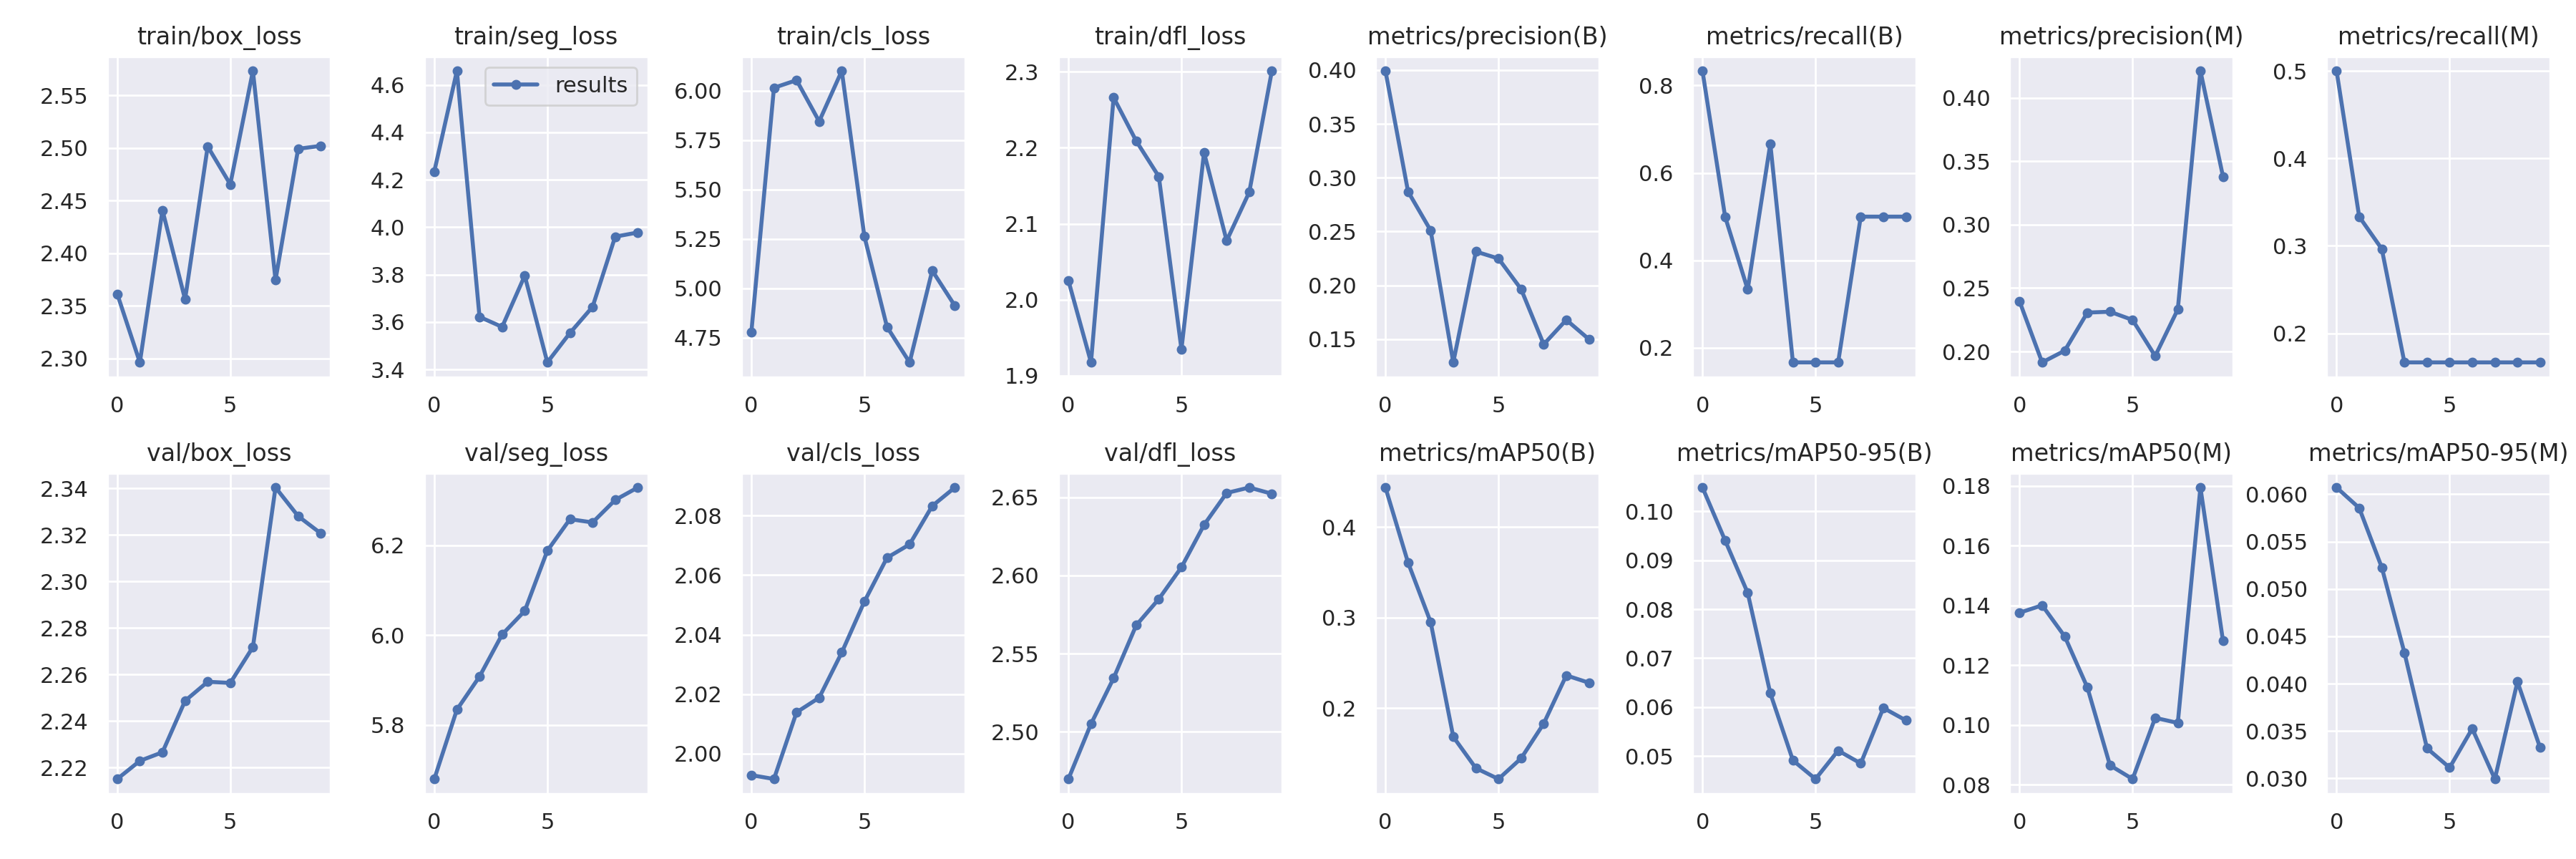

In [15]:
Image(filename=f'runs/segment/train/results.png',width=600)

In [ ]:
!yolo task=segment model=runs/segment/train/weights/best.pt data=data.yaml

In [17]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=test/images save=true

2024-02-17 06:01:27.631222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 06:01:27.631274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 06:01:27.632618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 06:01:28.647294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive

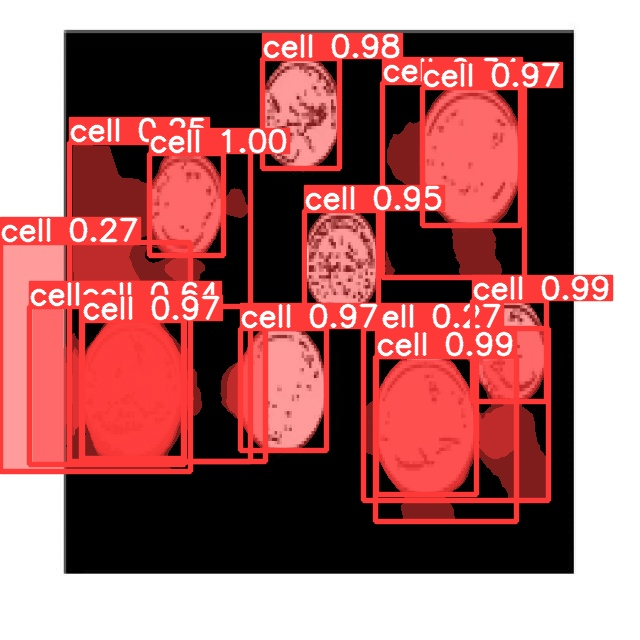

In [18]:
import glob
from IPython.display import Image,display
for image_path in glob.glob(f'runs/segment/predict/images_png.rf.f5a28687d60e0d7a60723ba71ac0dd90.jpg')[:3]:
  display(Image(filename=image_path,height=600))
  print("\n")